In [97]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [52]:
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
from nba_api.stats.endpoints.playbyplayv2 import PlayByPlayV2

## Play by play data

### Event descriptors

In [70]:
_SHOT_MADE = 1
_SHOT_MISSED = 2


## Drawing courts and shots

In [232]:
list(range(-10, 10))

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [375]:
from matplotlib.patches import Circle, Rectangle, Arc
import random

# Amazing function by Bradley Fay for plotting the nba court
# source: https://github.com/bradleyfay/py-Goldsberry/blob/master/docs/Visualizing%20NBA%20Shots%20with%20py-Goldsberry.ipynb
def draw_court(ax=None, color='black', lw=2, paint_color="#006BB6", outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False, zorder=0)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False, zorder=0)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False, zorder=0)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed', zorder=0)
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color, zorder=0)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 138, linewidth=lw,
                               color=color, zorder=0)
    corner_three_b = Rectangle((220, -47.5), 0, 138, linewidth=lw, color=color, zorder=0)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color, zorder=0)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color, zorder=0)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color, zorder=0)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    background_color = "#FDF5E6"
    random_line_colors = [
        "#FBB180", "#FBB180", "#FAB07F",
    ]
    all_hex = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F',]
    
    
    # Draw the half court line, baseline and side out bound lines
    outer_lines = Rectangle((-249, -48), 498, 469, linewidth=lw,
                            color=color, fill=None)
    court_elements.append(outer_lines)
    outer_lines_fill = Rectangle((-249, -48), 498, 470, linewidth=lw,
                            color=background_color, fill=True, zorder=-2)
    court_elements.append(outer_lines_fill)
    """x = -248
    while x <= 250:
        color = background_color
        bg_lw = random.randint(2, 4)
        if random.randint(0, 1) == 1:
            color = random_line_colors[random.randint(0, len(random_line_colors)-1)]
        court_elements.append(Rectangle((x, -48), bg_lw, 470, linewidth=1, color=color, fill=True, zorder=-2))
        x += bg_lw
    
    
    paint_background = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=paint_color,
                          fill=True, zorder=-1)
    court_elements.append(paint_background)
    """

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [376]:
def plot_raw_shotchart(data_frame, title, assist_df, image_name=None):
    plt.style.use('fivethirtyeight')
    fig, ax = plt.subplots(figsize=(12, 12))
    
    green = '#45B056'
    red = '#B04556'
    yellowish = '#4169E1'
    
    made_shots = data_frame.loc[data_frame.SHOT_MADE_FLAG == 1]
    missed_shots = data_frame.loc[data_frame.SHOT_MADE_FLAG == 0]
    
    paths = ax.scatter(
        x=made_shots.LOC_X,
        y=made_shots.LOC_Y,
        marker='o',
        c=green,
        s=100,
        alpha=0.8
    )
    
    paths = ax.scatter(
        x=missed_shots.LOC_X,
        y=missed_shots.LOC_Y,
        marker='x',
        c=red,
        s=100,
        alpha=0.8
    )
    
    paths = ax.scatter(
        x=assist_df.LOC_X,
        y=assist_df.LOC_Y,
        marker='o',
        c=yellowish,
        s=100,
        alpha=0.8
    )
        
    # Legend
    ax.scatter(x=230, y=380, s=400, marker='o', c=green)
    ax.text(x=220, y=380, s="Made", color=green, fontsize=18, ha='right', va='center')
    ax.scatter(x=230, y=360, s=400, marker='x', c=red)
    ax.text(x=220, y=360, s="Missed", color=red, fontsize=18, ha='right', va='center')
    ax.scatter(x=230, y=340, s=400, marker='o', c=yellowish)
    ax.text(x=220, y=340, s="Made on Doncic AST", color=yellowish, fontsize=18, ha='right', va='center')
    
    
    # Changing court color
    #ax.set_facecolor('#FFFAFA')
    

    # Removing ticks
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.grid(False)

    # Title
    plt.title(title, size=20)
    
    # Drawing court
    draw_court(ax=ax,outer_lines=True, lw=3)
    ax.set_xlim(-251,251)
    ax.set_ylim(-65,423)
    
    if image_name:
        fig.savefig(image_name, bbox_inches='tight')

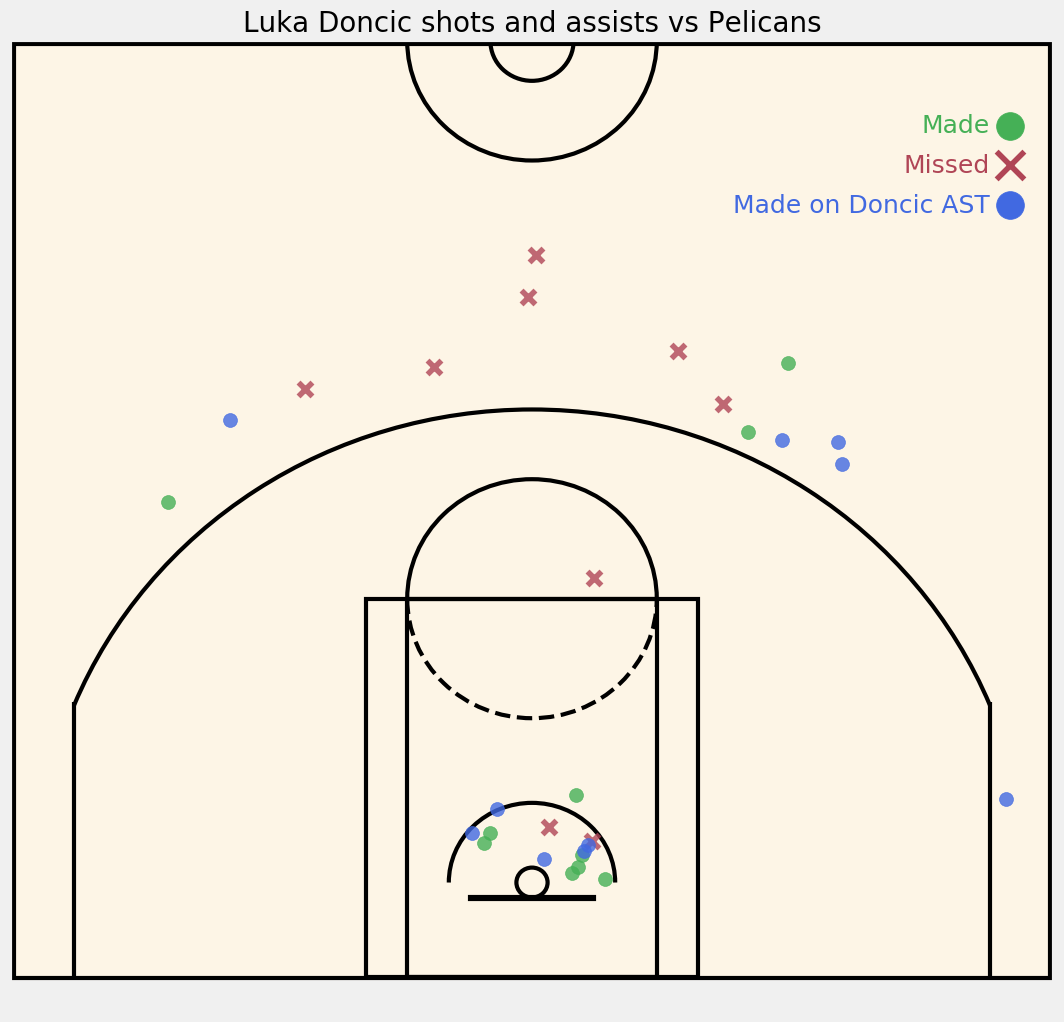

In [377]:
plot_raw_shotchart(doncic_shots, title="Luka Doncic shots and assists vs Pelicans", assist_df=doncic_assisted_shots)

## Luka Doncic triple double

In [54]:
play_by_play = PlayByPlayV2(game_id="0021900021")

In [60]:
dallas_pbp = play_by_play.get_data_frames()[0]

In [69]:
_doncic_id = 1629029

In [84]:
_dallas_id = "1610612742"
_dallas_game_id = "0021900021"

In [81]:
doncic_data = dallas_pbp.loc[(dallas_pbp.PLAYER2_ID == _doncic_id) | (dallas_pbp.PLAYER1_ID == _doncic_id)]

In [85]:
doncic_data.loc[(doncic_data.EVENTMSGTYPE != _SHOT_MADE) & (doncic_data.EVENTMSGTYPE != _SHOT_MISSED)]

In [107]:
dallas_shots = ShotChartDetail(team_id=_dallas_id, player_id=0, game_id_nullable=_dallas_game_id, context_measure_simple="FGA")

In [108]:
dallas_shots = dallas_shots.get_data_frames()[0]

In [109]:
doncic_assists = doncic_data.loc[(doncic_data.PLAYER2_ID == _doncic_id) & (doncic_data.EVENTMSGTYPE == _SHOT_MADE)]

In [110]:
doncic_assisted_shots = pd.merge(left=doncic_assists, right=dallas_shots, left_on="EVENTNUM", right_on="GAME_EVENT_ID", how="left")

In [111]:
doncic_shots = dallas_shots.loc[dallas_shots.PLAYER_ID == _doncic_id]

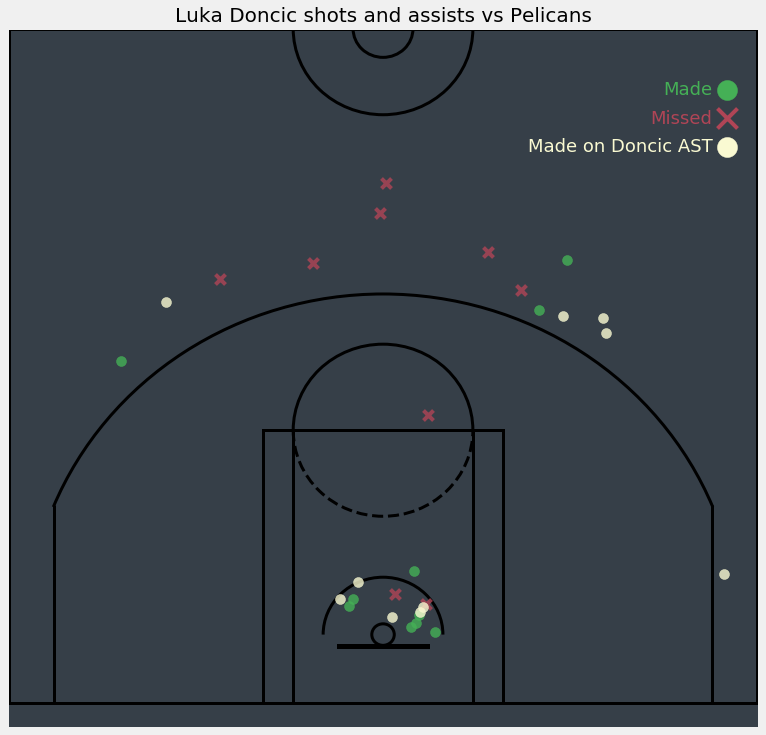

## Nikola Jokic triple double